In [1]:
# Importa a biblioteca pandas, amplamente usada para manipulação e análise de dados tabulares.
# Importa a biblioteca numpy, fundamental para operações numéricas e arrays multidimensionais.
# Importa a biblioteca pickle, usada para serializar e desserializar objetos Python,
# o que permite salvar e carregar modelos treinados ou dados pré-processados.
# Importa o classificador SVC (Support Vector Classifier) do módulo svm do scikit-learn.
# SVC é o algoritmo de Máquinas de Vetores de Suporte para classificação.
# Importa accuracy_score para calcular a acurácia do modelo, uma métrica de avaliação comumt
# Importa ConfusionMatrix da biblioteca yellowbrick para visualizar a matriz de confusão.
# yellowbrick é uma biblioteca de visualização para machine learning.
import pandas as pd
import numpy as np
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

In [2]:
# Abre o arquivo 'credit.pkl' em modo de leitura binária ('rb').
# Este arquivo contém os dados de treinamento e teste para o dataset de crédito.
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
# Exibe as dimensões (número de linhas e colunas) do conjunto de dados de treinamento de crédito.
# Isso ajuda a verificar se os dados foram carregados corretamente.
X_credit_treinamento.shape

(1500, 3)

In [4]:
# Exibe as dimensões (número de linhas e colunas) do conjunto de dados de teste de crédito.
# É importante que o número de colunas seja o mesmo do conjunto de treinamento.
X_credit_teste.shape

(500, 3)

In [5]:
# Inicializa o modelo SVC (Support Vector Classifier) para o dataset de crédito.
# 'kernel="rbf"' especifica o uso do kernel de Função de Base Radial, que é bom para problemas não lineares.
# 'random_state=1' garante que os resultados sejam reproduzíveis.
# 'C=2.0' é o parâmetro de regularização. Um valor maior de C tenta classificar corretamente
# o máximo de amostras de treinamento possível, mesmo que isso leve a uma margem menor.
credit_svm = SVC(kernel='rbf', random_state=1, C= 2.0)
# Treina o modelo SVC usando os dados de treinamento (features e rótulos).
credit_svm.fit(X_credit_treinamento, y_credit_treinamento)


SVC(C=2.0, random_state=1)

In [6]:
# Realiza previsões no conjunto de dados de teste de crédito usando o modelo treinado.
# As previsões são as classes que o modelo atribui a cada amostra de teste.
previsoes = credit_svm.predict(X_credit_teste)
# Exibe as previsões geradas pelo modelo.
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [7]:
# Exibe os rótulos verdadeiros (ground truth) do conjunto de dados de teste de crédito.
# Isso permite a comparação direta com as previsões para avaliar o desempenho do modelo.
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [8]:
# Calcula e exibe a acurácia do modelo comparando as previsões com os rótulos verdadeiros.
# A acurácia é a proporção de previsões corretas.
accuracy_score(y_credit_teste, previsoes)

0.988

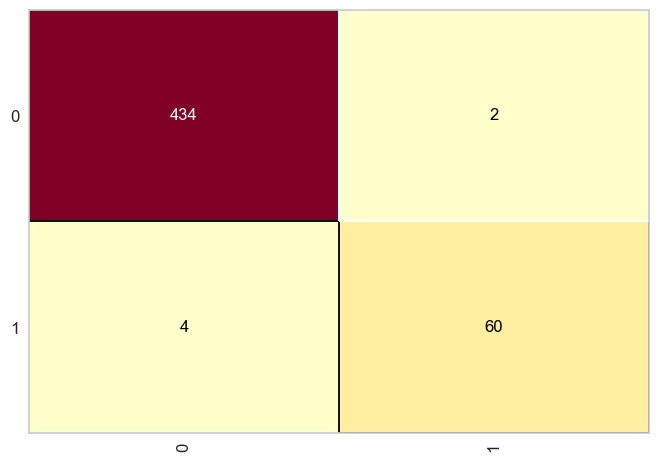

In [9]:
# Inicializa a matriz de confusão visual usando o modelo SVM de crédito.
cm_credit = ConfusionMatrix(credit_svm)
# Treina a matriz de confusão com os dados de treinamento. Isso é necessário para que ela
# aprenda as classes e o mapeamento.
cm_credit.fit(X_credit_treinamento, y_credit_treinamento)
# Avalia o modelo nos dados de teste e plota a matriz de confusão.
# A matriz de confusão mostra o número de verdadeiros positivos, verdadeiros negativos,
# falsos positivos e falsos negativos.
cm_credit.score(X_credit_teste, y_credit_teste)
# Salvar a matrix como imagem
plt.savefig('confusion_matrix_credit_svm.png')

In [10]:
# Imprime o relatório de classificação completo.
# Este relatório inclui precisão (precision), recall (revocação), F1-score e suporte (support)
# para cada classe, fornecendo uma avaliação mais detalhada do desempenho do modelo.
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



In [11]:
# Abre o arquivo 'census.pkl' em modo de leitura binária ('rb').
# Este arquivo contém os dados de treinamento e teste para o dataset do censo.
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [12]:
# Exibe as dimensões do conjunto de dados de treinamento do censo.
X_census_treinamento.shape

(27676, 108)

In [13]:
# Exibe as dimensões do conjunto de dados de teste do censo.
X_census_teste.shape

(4885, 108)

In [14]:
# Inicializa o modelo SVC para o dataset do censo.
# Por ter mais dados esse processamento pode demorar um pouco mais
# 'kernel="linear"' especifica o uso de um kernel linear, adequado para dados linearmente separáveis
# ou quando a alta dimensionalidade é um fator (como é comum em dados de censo).
# 'random_state=1' garante a reproduzibilidade.
# 'C=1.0' é o parâmetro de regularização.
census_svm = SVC(kernel='linear', random_state=1, C = 1.0)
# Treina o modelo SVC usando os dados de treinamento do censo.
census_svm.fit(X_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [15]:
# Realiza previsões no conjunto de dados de teste do censo usando o modelo treinado.
previsoes = census_svm.predict(X_census_teste)
# Exibe as previsões geradas pelo modelo.
previsoes


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      shape=(4885,), dtype=object)

In [16]:
# Exibe os rótulos verdadeiros do conjunto de dados de teste do censo.
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      shape=(4885,), dtype=object)

In [17]:
# Calcula e exibe a acurácia do modelo do censo comparando as previsões com os rótulos verdadeiros.
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

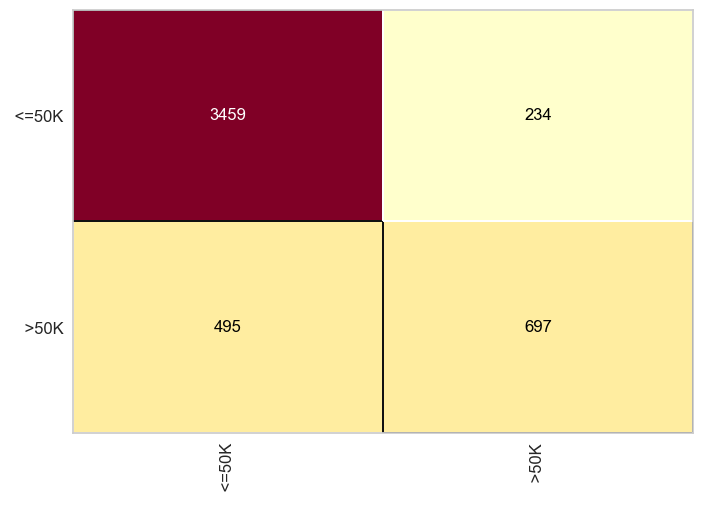

In [18]:
# Inicializa a matriz de confusão visual usando o modelo SVM do censo.
cm_census = ConfusionMatrix(census_svm)
# Treina a matriz de confusão com os dados de treinamento do censo.
cm_census.fit(X_census_treinamento, y_census_treinamento)
# Avalia o modelo nos dados de teste do censo e plota a matriz de confusão.
cm_census.score(X_census_teste, y_census_teste)
# Salvar a matrix como imagem
plt.savefig('confusion_matrix_census.png')

In [19]:
# Imprime o relatório de classificação completo para o modelo do censo.
# Isso inclui métricas detalhadas para cada classe de renda (>50K e <=50K).
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

